<a href="https://colab.research.google.com/github/Mhuong-ccmdd/test/blob/main/PROEJCT_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ĐỒ ÁN MÔN HỌC : TRÍ TUỆ NHÂN TẠO (AI)**

 ```
GVDH: PSG. TS. NGUYỄN TRƯỜNG THỊNH
SVTH: TRẦN HOÀNG BẢO PHƯƠNG
MSSV: 19146244
NHÓM : 05CLC
BUỔI: SÁNG THỨ 4 TIẾT 2-7
LỚP : CHẤT LƯỢNG CAO TIẾNG VIỆT

```



# **ĐỀ TÀI: SỬ DỤNG THUẬT TOÁN CNN ĐỂ DỰ BÁO BỆNH VIÊM PHỔI, UNG THƯ PHỔI BẰNG ẢNH X-RAYS ĐƯA LÊN WEBSITE.**

# **PHẦN 1:** TRUY CẬP VÀO ĐƯỜNG DẪN TẬP DỮ LIỆU CẦN DÙNG VÀ HIỂN THỊ ẢNH CHƯA XỬ LÝ THÔNG QUA BIỂU ĐỒ VÀ CÁC DẠNG ẢNH CỤ THỂ

In [2]:
#Kết nối Drive với ggcolab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.1. KHAI BÁO CÁC THƯ VIỆN CẦN SỬ DỤNG**

In [4]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 21.2 MB/s eta 0:00:00


In [17]:
#KHAI BÁO TẤT CẢ THƯ VIỆN CẦN DÙNG
# Keras và TensorFlow
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import FalseNegatives, FalsePositives, SpecificityAtSensitivity
from tensorflow.keras import layers, models, optimizers

# Công cụ phân tích và xử lý
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# Hệ thống và tiện ích
import os
import shutil
import random

In [5]:
#ĐƯỜNG DẪN ĐẾN TẬP TRAIN, VALIDATION,TEST TRONG MYDRIVE
train_folder = '/content/drive/MyDrive/tai lieu AI/datasets_xray/train'
val_folder  =  '/content/drive/MyDrive/tai lieu AI/datasets_xray/validation'
test_folder =  '/content/drive/MyDrive/tai lieu AI/datasets_xray/test'

In [6]:
#The dataset is divided into three sets: 1) train set 2) validation set and 3) test set. Let's grab the dataset
# Define path to the data directory
train_normal = '/content/drive/MyDrive/tai lieu AI/datasets_xray/train/NORMAL'
train_pneumonia = '/content/drive/MyDrive/tai lieu AI/datasets_xray/train/PNEUMONIA'
train_virus = '/content/drive/MyDrive/tai lieu AI/datasets_xray/train/PNEUMONIA(VIRUS)'

**1.2. HIỂN THỊ BIỂU ĐỒ CỘT VÀ BIỂU ĐỒ TRÒN MÔ TẢ CỤ THỂ DỮ LIỆU**

In [19]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đường dẫn tới các thư mục
train_folder = '/path/to/train'
test_folder = '/path/to/test'
val_folder = '/path/to/validation'

# Đếm số lượng hình ảnh trong từng lớp cho từng tập dữ liệu
print("Train set:")
if os.path.exists(train_folder):
    print(f"PNEUMONIA = {len(os.listdir(os.path.join(train_folder, 'PNEUMONIA')))}")
    print(f"PNEUMONIA VIRUS = {len(os.listdir(os.path.join(train_folder, 'PNEUMONIA(VIRUS)')))}")
    print(f"NORMAL = {len(os.listdir(os.path.join(train_folder, 'NORMAL')))}")
else:
    print("Train folder does not exist.")

print('=' * 60)
print("Test set:")
if os.path.exists(test_folder):
    print(f"PNEUMONIA = {len(os.listdir(os.path.join(test_folder, 'PNEUMONIA')))}")
    print(f"PNEUMONIA VIRUS = {len(os.listdir(os.path.join(test_folder, 'PNEUMONIA(VIRUS)')))}")
    print(f"NORMAL = {len(os.listdir(os.path.join(test_folder, 'NORMAL')))}")
else:
    print("Test folder does not exist.")

print('=' * 60)
print("Validation set:")
if os.path.exists(val_folder):
    print(f"PNEUMONIA = {len(os.listdir(os.path.join(val_folder, 'PNEUMONIA')))}")
    print(f"PNEUMONIA VIRUS = {len(os.listdir(os.path.join(val_folder, 'PNEUMONIA(VIRUS)')))}")
    print(f"NORMAL = {len(os.listdir(os.path.join(val_folder, 'NORMAL')))}")
else:
    print("Validation folder does not exist.")

# Tạo bảng và biểu đồ cho Train set
if os.path.exists(train_folder):
    classes = os.listdir(train_folder)
    counts = [len(os.listdir(os.path.join(train_folder, cls))) for cls in classes]
    DF = pd.DataFrame({'classes': classes, 'count': counts})
    plt.figure(figsize=(8, 6))
    sns.barplot(x='classes', y='count', data=DF)
    plt.title("TRAIN SET")
    plt.show()

Train set:
Train folder does not exist.
Test set:
Test folder does not exist.
Validation set:
Validation folder does not exist.


NameError: name 'DF' is not defined

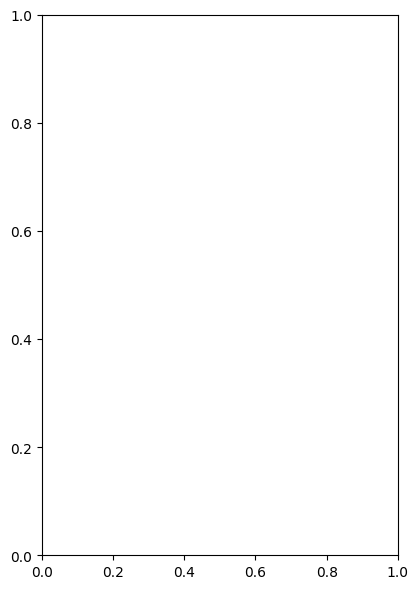

In [20]:
#VẼ BIỂU ĐỒ TRÒN
#VẼ BIỂU ĐỒ TRÒN
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.tight_layout()
plt.pie(DF['count'],
        labels=DF['classes'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('TRAIN SET')
plt.show()

plt.figure(figsize=(8,6))
plt.subplot(1,2,2)
plt.tight_layout()
plt.pie(DF1['count'],
        labels=DF1['classes'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('TEST SET')
plt.show()

plt.figure(figsize=(8,6))
plt.subplot(2,2,3)
plt.tight_layout()
plt.pie(DF2['count'],
        labels=DF2['classes'],
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('VALIDATION SET')
plt.show()

**1.3. GẮN NHÃN CỤ THỂ VÀ HIỂN THỊ HÌNH ẢNH THÔ TRÊN TẬP DỮ LIỆU**

In [9]:
#Đặt nhãn cho từng bệnh trong folder train
class_type = {0 : 'NORMAL', 1:'PNEUMONIA',2:'PNEUMONIA'}
labels = ['NORMAL','PNEUMONIA', 'PNEUMONIA(VIRUS)']

In [10]:
import random
from PIL import Image
rand_normal = random.choice(os.listdir(train_normal))
rand_pnemonia = random.choice(os.listdir(train_pneumonia))
rand_virus = random.choice(os.listdir(train_virus))

nor_im = Image.open(train_normal + "/"+rand_normal)
pne_im = Image.open(train_pneumonia + "/"+rand_pnemonia)
vir_im = Image.open(train_virus + "/"+rand_virus)
a = plt.figure(figsize=(20,10))

a1 = a.add_subplot(1,3,1)
imgplot = plt.imshow(nor_im)
a1.set_title("Normal")

a2 = a.add_subplot(1,3,2)
imgplot = plt.imshow(pne_im)
a2.set_title("Pneumonia")

a3 = a.add_subplot(1,3,3)
imgplot = plt.imshow(vir_im)
a3.set_title("Lung cancer")



NameError: name 'os' is not defined

**1.4.  TIỀN XỬ LÝ DỮ LIỆU**

In [11]:
# preprocessing the training dataset
#Tăng cường dữ liệu

print('Train set: ')
data_gen = ImageDataGenerator(rescale=1.0 / 255.0,
                              rotation_range=10,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              horizontal_flip=False,
                              zoom_range=0.3)
train_set = data_gen.flow_from_directory(directory=train_folder,
                              target_size = (224,224),
                              batch_size = 32,
                              shuffle=False,
                              class_mode="categorical")
print('Test set:')
test_set = data_gen.flow_from_directory(directory=test_folder,
                              target_size = (224,224),
                              batch_size = 32,
                              shuffle=False,
                              class_mode="categorical")
print('Validation set:')
val_set = data_gen.flow_from_directory(directory=val_folder,
                              target_size = (224,224),
                              batch_size = 32,
                              shuffle=False,
                              class_mode="categorical")


Train set: 


NameError: name 'ImageDataGenerator' is not defined

In [12]:
# printing the assigned indices for sanity check
print(f'class indices:  {train_set.class_indices}')

NameError: name 'train_set' is not defined

In [14]:
# check for the generator output
i = 0
for data_batch, labels_batch in train_set:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    i = i+1
    if i > 5:
        break

NameError: name 'train_set' is not defined

In [ ]:
import os
import glob
import cv2

train_data1 = []
# Go through all the normal cases. The label for these cases will be 0
for img in train_normal:
  img = cv2.imread(os.path.join(train_normal))
  train_data1.append((train_normal,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in train_pneumonia:
  img = cv2.imread(os.path.join(train_pneumonia))
  train_data1.append((train_pneumonia, 1))

# Go through all the pneumonia cases. The label for these cases will be 2
for img in train_pneumonia:
  img = cv2.imread(os.path.join(train_virus))
  train_data1.append((train_virus, 2))

# Get a pandas dataframe from the data we have in our list
train_data1 = pd.DataFrame(train_data1, columns=['image', 'labels'])

# Shuffle the data ->> random data
train_data1 = train_data1.sample(frac=1.).reset_index(drop=True)

In [ ]:
# How the dataframe looks like?
train_data1

,image,labels
0,/content/drive/MyDrive/tai lieu AI/datasets_xr...,1
1,/content/drive/MyDrive/tai lieu AI/datasets_xr...,1
2,/content/drive/MyDrive/tai lieu AI/datasets_xr...,2
3,/content/drive/MyDrive/tai lieu AI/datasets_xr...,2
4,/content/drive/MyDrive/tai lieu AI/datasets_xr...,0
...,...,...
184,/content/drive/MyDrive/tai lieu AI/datasets_xr...,0
185,/content/drive/MyDrive/tai lieu AI/datasets_xr...,0
186,/content/drive/MyDrive/tai lieu AI/datasets_xr...,0
187,/content/drive/MyDrive/tai lieu AI/datasets_xr...,2


# ẢNH X-RAYS BỊ BỆNH VIÊM PHỔI

In [15]:
pneumonia = os.listdir('/content/drive/MyDrive/tai lieu AI/datasets_xray/train/PNEUMONIA')
pneumonia_dir = '/content/drive/MyDrive/tai lieu AI/datasets_xray/train/PNEUMONIA'

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Bệnh Viêm Phổi")

plt.tight_layout()


NameError: name 'os' is not defined

# ẢNH X-RAYS BỊ UNG THƯ PHỔI

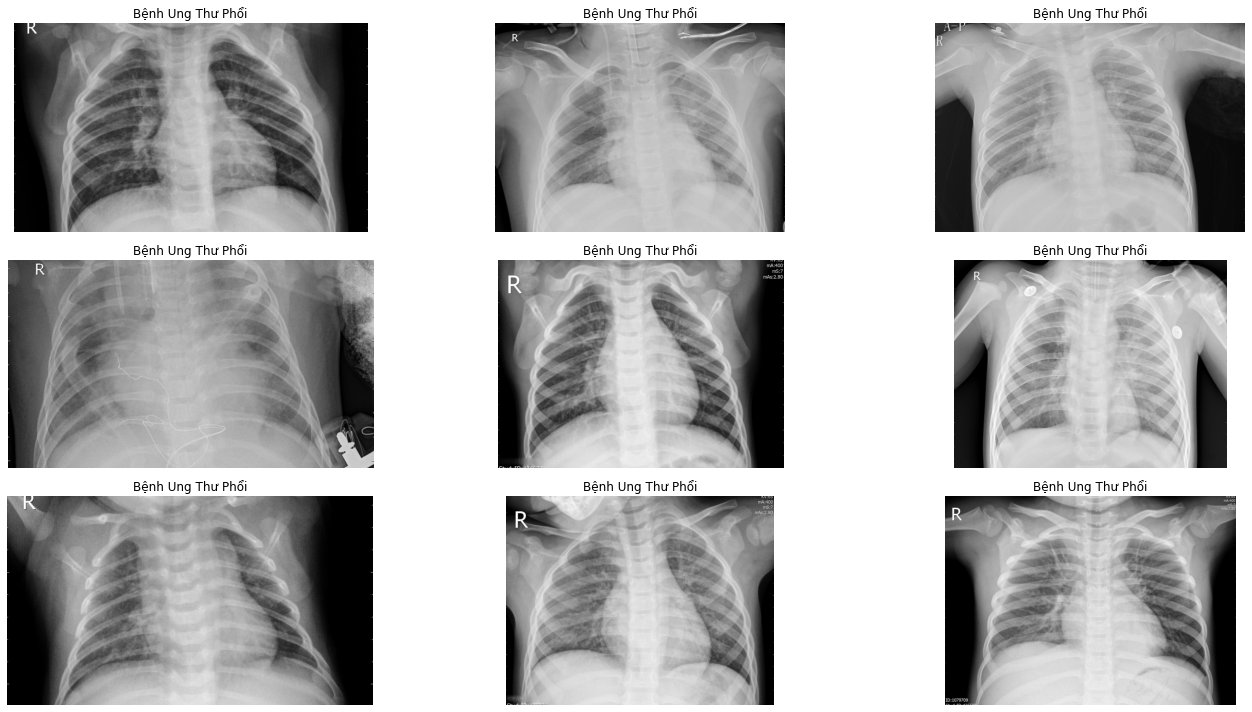

In [ ]:
cancer = os.listdir('/content/drive/MyDrive/tai lieu AI/datasets_xray/train/PNEUMONIA(VIRUS)')
virus_dir = '/content/drive/MyDrive/tai lieu AI/datasets_xray/train/PNEUMONIA(VIRUS)'

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(virus_dir, cancer[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Bệnh Ung Thư Phổi")

plt.tight_layout()


# ẢNH X-RAY NGƯỜI KHỎE MẠNH

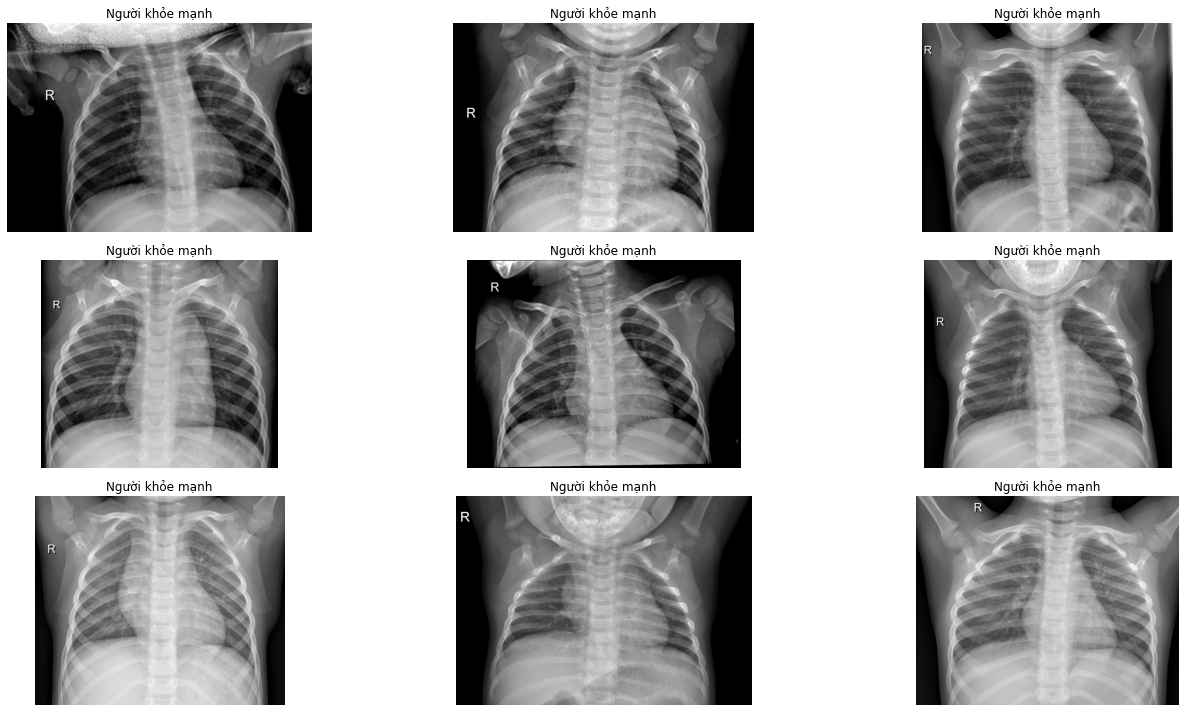

In [ ]:
healthy = os.listdir('/content/drive/MyDrive/tai lieu AI/datasets_xray/train/NORMAL')
healthy_dir = '/content/drive/MyDrive/tai lieu AI/datasets_xray/train/NORMAL'

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(healthy_dir, healthy[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Người khỏe mạnh")

plt.tight_layout()


**1.5. GIAI ĐOẠN TIỀN XỬ LÝ DỮ LIỆU: DATA PREPROSESSING**

In [ ]:
# preprocessing the training dataset
#Tăng cường dữ liệu

print('Train set: ')
data_gen = ImageDataGenerator(rescale=1.0 / 255.0,
                              rotation_range=10,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              horizontal_flip= False,
                              zoom_range=0.3)
train_set = data_gen.flow_from_directory(directory=train_folder,
                              target_size = (224,224),
                              batch_size = 32,
                              shuffle=False,
                              class_mode="categorical")
print('Test set:')
test_set = data_gen.flow_from_directory(directory=test_folder,
                              target_size = (224,224),
                              batch_size = 32,
                              shuffle=False,
                              class_mode="categorical")
print('Validation set:')
val_set = data_gen.flow_from_directory(directory=val_folder,
                              target_size = (224,224),
                              batch_size = 32,
                              shuffle=False,
                              class_mode="categorical")


Train set: 
Found 3649 images belonging to 3 classes.
Test set:
Found 1323 images belonging to 3 classes.
Validation set:
Found 66 images belonging to 3 classes.


# PHẦN 2: TẠP PHÂN LỚP CHO MẠNG THẦN KINH TÍCH CHẬP CHO VIỆC HUẤN LUYỆN MÔ HÌNH CONVOLUTION NEUROL NETWORK

**2.1   TẠO CÁC LAYER CHO MẠNG CNN**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    

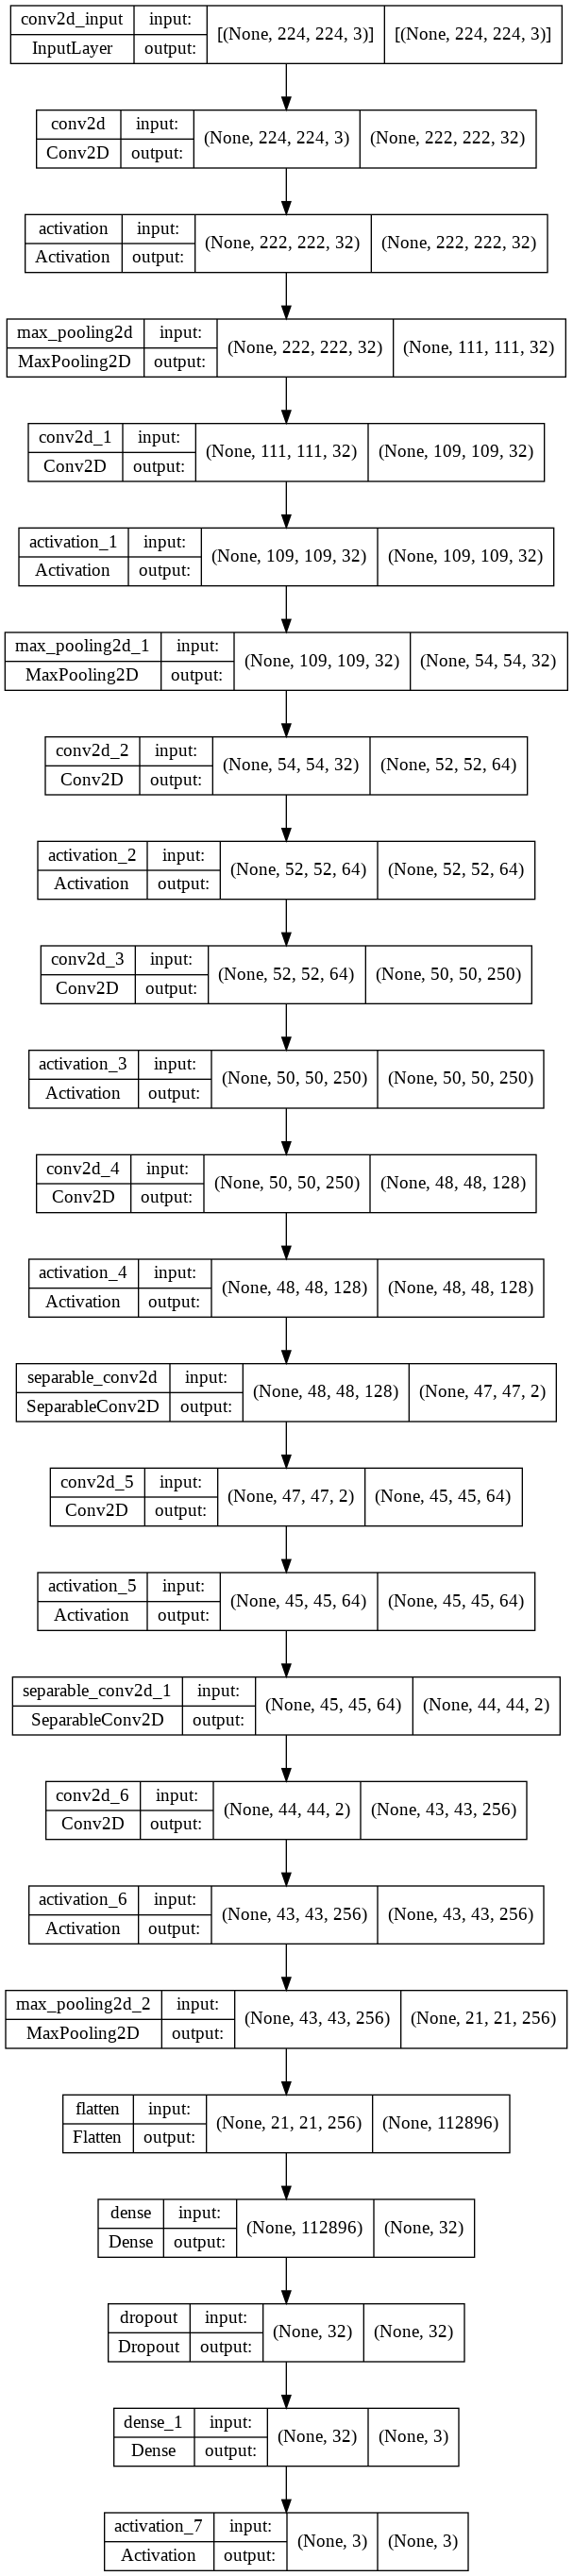

In [ ]:
from keras.layers import SeparableConv2D
from keras import optimizers,regularizers
from tensorflow.python.keras import regularizers


model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(SeparableConv2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(SeparableConv2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(3))
model.add(Activation("softmax"))
#  Display cnn_model
model.summary()

#  Hiển thị hàm cnn_model.summary() dưới dạng biểu đồ
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_final.png',show_shapes = True)

In [16]:
#Visualize of the Model
visualkeras.layered_view(model)


NameError: name 'visualkeras' is not defined

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1.1 (Conv2D)           (None, 126, 126, 200)     5600      
                                                                 
 conv_1.2 (Conv2D)           (None, 124, 124, 200)     360200    
                                                                 
 pool_1 (MaxPooling2D)       (None, 62, 62, 200)       0         
                                                                 
 conv_2.1 (SeparableConv2D)  (None, 60, 60, 64)        14664     
                                                                 
 conv_2.2 (SeparableConv2D)  (None, 58, 58, 64)        4736      
                                                                 
 pool_2 (MaxPooling2D)       (None, 29, 29, 64)        0         
                                                                 
 conv_3.1 (SeparableConv2D)  (None, 27, 27, 64)       

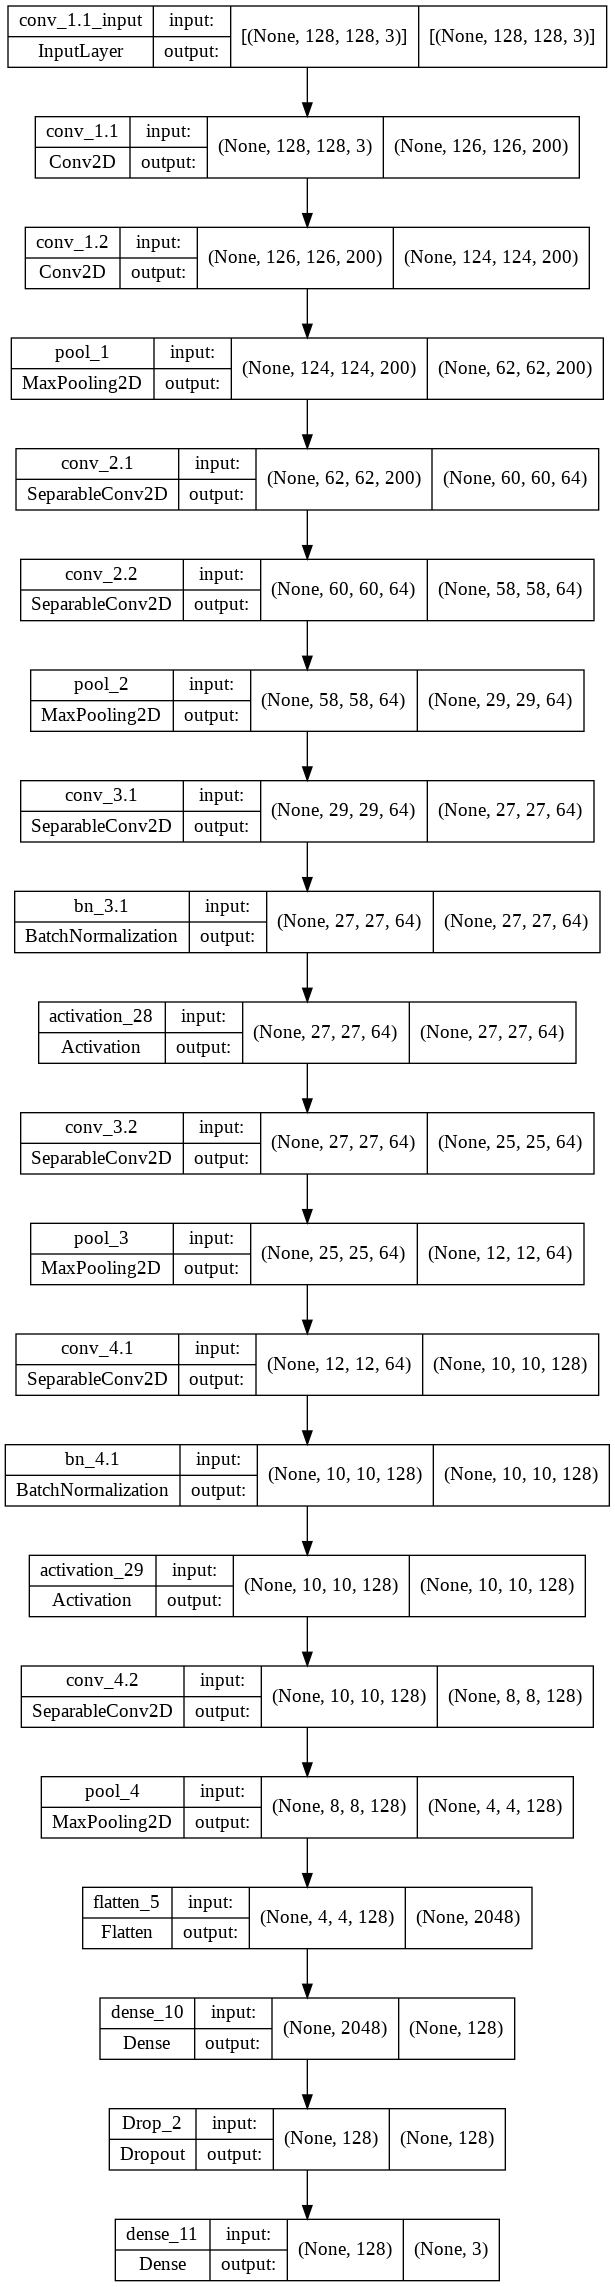

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu", input_shape=(128,128,3),name="conv_1.1"))
model.add(Conv2D(32,(3,3),activation="relu",name="conv_1.2"))
model.add(MaxPooling2D((2,2),name="pool_1"))

model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.1"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.2"))
model.add(MaxPooling2D((2,2),name="pool_2"))

model.add(SeparableConv2D(64,(3,3),name="conv_3.1"))
model.add(BatchNormalization(name='bn_3.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_3.2"))
model.add(MaxPooling2D((2,2),name="pool_3"))

model.add(SeparableConv2D(128,(3,3),name="conv_4.1"))
model.add(BatchNormalization(name='bn_4.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(128,(3,3),activation="relu",name="conv_4.2"))
model.add(MaxPooling2D((2,2),name="pool_4"))

model.add(Flatten())

model.add(Dense(activation="relu",units=128,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7,name="Drop_2"))
model.add(Dense(activation="softmax",units=3))

#  Display cnn_model
model.summary()

#  Hiển thị hàm cnn_model.summary() dưới dạng biểu đồ
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_final1.png',show_shapes = True)


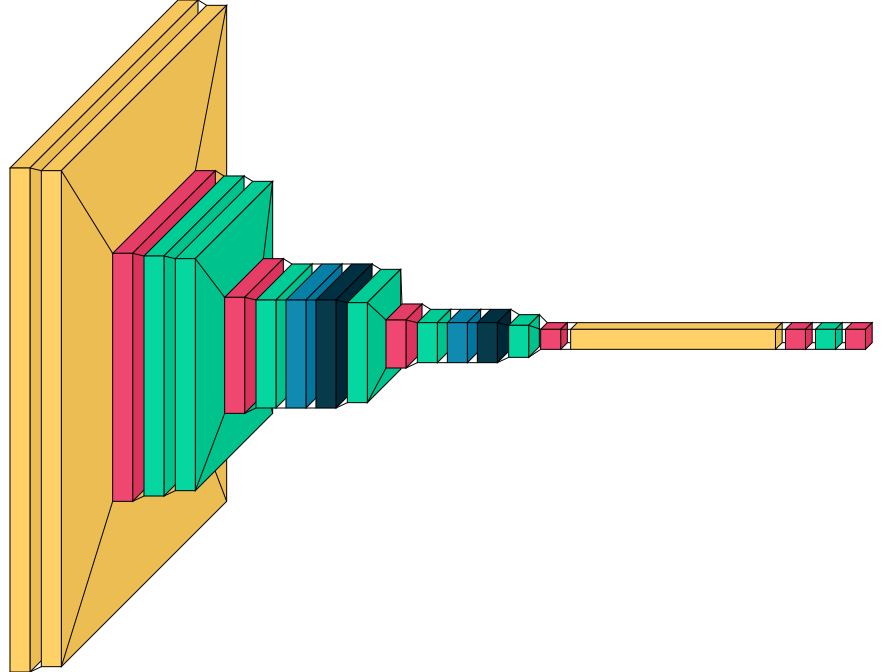

In [ ]:
#Visualize of the Model
visualkeras.layered_view(model)

**2.2  COMPILE MODEL ĐỂ CHUẨN BỊ HUẤN LUYỆN**

In [ ]:
model_final = model
a1 = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_final.compile(loss='categorical_crossentropy',
              optimizer = a1,
              metrics= ['accuracy'])

# save model to file
model_final.save('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_final1.h5')

**MÔ HÌNH HUẤN LUYỆN TỐI ƯU NHẤT ĐƯỢC CHỌN**

In [ ]:
train_gen = ImageDataGenerator(shear_range=0.2,horizontal_flip=True,rescale=1.0/255)

sc_gen = ImageDataGenerator(rescale=1.0/255)
train_set = train_gen.flow_from_directory(directory=train_folder,
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode="categorical")
test_set = sc_gen.flow_from_directory(directory=test_folder,
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode="categorical")
val_set = sc_gen.flow_from_directory(directory=val_folder,
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode="categorical")

Found 3649 images belonging to 3 classes.
Found 1323 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu", input_shape=(128,128,3),name="conv_1.1"))
model.add(Conv2D(32,(3,3),activation="relu",name="conv_1.2"))
model.add(MaxPooling2D((2,2),name="pool_1"))

model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.1"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.2"))
model.add(MaxPooling2D((2,2),name="pool_2"))

model.add(SeparableConv2D(64,(3,3),name="conv_3.1"))
model.add(BatchNormalization(name='bn_3.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_3.2"))
model.add(MaxPooling2D((2,2),name="pool_3"))

model.add(SeparableConv2D(128,(3,3),name="conv_4.1"))
model.add(BatchNormalization(name='bn_4.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(128,(3,3),activation="relu",name="conv_4.2"))
model.add(MaxPooling2D((2,2),name="pool_4"))

model.add(Flatten())

model.add(Dense(activation="relu",units=128,
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7,name="Drop_2"))
model.add(Dense(activation="sigmoid",units=3))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
,loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1.1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 conv_1.2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 pool_1 (MaxPooling2D)       (None, 62, 62, 32)        0         
                                                                 
 conv_2.1 (SeparableConv2D)  (None, 60, 60, 64)        2400      
                                                                 
 conv_2.2 (SeparableConv2D)  (None, 58, 58, 64)        4736      
                                                                 
 pool_2 (MaxPooling2D)       (None, 29, 29, 64)        0         
                                                                 
 conv_3.1 (SeparableConv2D)  (None, 27, 27, 64)       

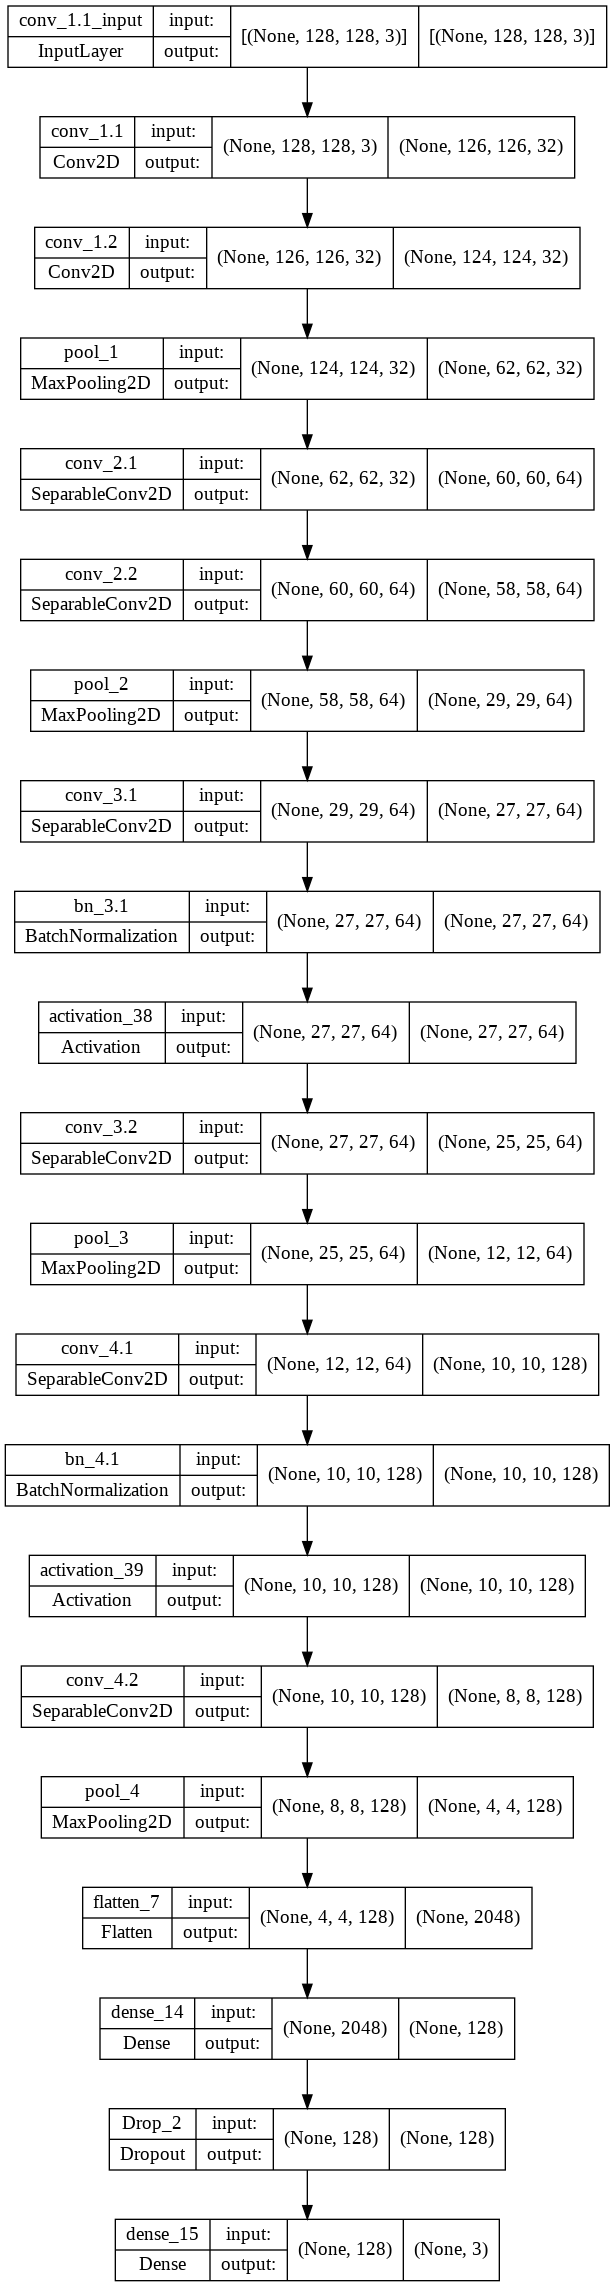

In [ ]:

#  Hiển thị hàm cnn_model.summary() dưới dạng biểu đồ
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_final1.png',show_shapes = True)


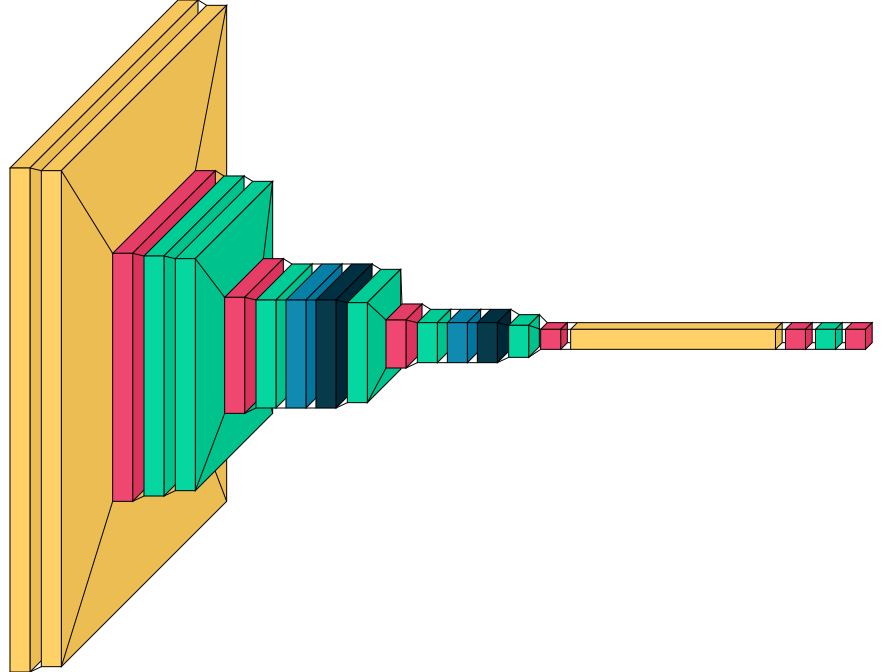

In [ ]:
#Visualize of the Model
visualkeras.layered_view(model)


In [ ]:
filepath="weights.best1.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
xray_model = model.fit(train_set,
                      verbose = 1,
                      callbacks=callbacks_list,
                      epochs = 40,
                      validation_data = test_set,
                      batch_size = 32)

Epoch 1/40
115/115 [==============================] - 319s 3s/step - loss: 0.6902 - accuracy: 0.6670 - val_loss: 1.1689 - val_accuracy: 0.3613
Epoch 2/40
115/115 [==============================] - 176s 2s/step - loss: 0.6589 - accuracy: 0.6733 - val_loss: 1.1215 - val_accuracy: 0.4535
Epoch 3/40
115/115 [==============================] - 179s 2s/step - loss: 0.6469 - accuracy: 0.6980 - val_loss: 0.9615 - val_accuracy: 0.5714
Epoch 4/40
115/115 [==============================] - 175s 2s/step - loss: 0.6295 - accuracy: 0.6980 - val_loss: 0.9683 - val_accuracy: 0.4769
Epoch 5/40
115/115 [==============================] - 172s 1s/step - loss: 0.6255 - accuracy: 0.7005 - val_loss: 0.8538 - val_accuracy: 0.5488
Epoch 6/40
115/115 [==============================] - 173s 2s/step - loss: 0.5994 - accuracy: 0.7144 - val_loss: 0.8462 - val_accuracy: 0.6213
Epoch 7/40
115/115 [==============================] - 174s 2s/step - loss: 0.6474 - accuracy: 0.7027 - val_loss: 0.8240 - val_accuracy: 0.6274

**2.3  LƯU MÔ HÌNH SAU KHI HUẤN LUYỆN**

In [ ]:
# Loading the saved version
xray_model = tf.keras.models.load_model('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/final_modelv1.h5')



In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/final_modelv1.h5')

In [ ]:
save_dir = '/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/'
model_name = 'final_modelv1.h5'
new_model1 = os.path.join(save_dir, model_name)
model.save (new_model1)
print( 'Saved trained model at %s ' % new_model1)

Saved trained model at /content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/final_modelv1.h5 


In [ ]:
#  ĐÁNH GIÁ MÔ HÌNH DỰA TRÊN TẬP TEST
# Train data
score_train = model.evaluate(train_set)
print("Train Loss: ", score_train[0])
print("Train Accuracy: ", score_train[1])

# Test data
score_test = model.evaluate(val_set)
print("Test Loss: ", score_test[0])
print("Test Accuracy: ", score_test[1])

115/115 [==============================] - 75s 647ms/step - loss: 0.4536 - accuracy: 0.7953
Train Loss:  0.45360860228538513
Train Accuracy:  0.7952863574028015
3/3 [==============================] - 14s 7s/step - loss: 0.8140 - accuracy: 0.5152
Test Loss:  0.8140225410461426
Test Accuracy:  0.5151515007019043


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/final_modelv1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**2.4  HIỆN THỊ ĐỘ CHÍNH XÁC VÀ HÀM MẤT MÁT DƯỚI DẠNG ĐỒ THỊ**

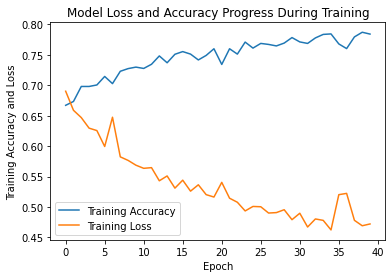

In [ ]:
plt.plot(xray_model.history['accuracy'])
plt.plot(xray_model.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])


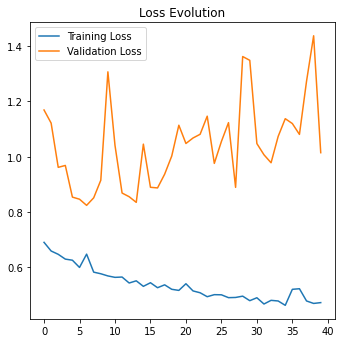

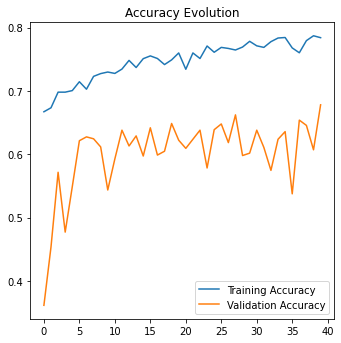

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.plot(xray_model.history['loss'], label='Training Loss')
plt.plot(xray_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/loss_trainA.png')
plt.title('Loss Evolution')
plt.show()

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 2)
plt.plot(xray_model.history['accuracy'], label='Training Accuracy')
plt.plot(xray_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/loss_trainB.png')
plt.title('Accuracy Evolution')
plt.show()

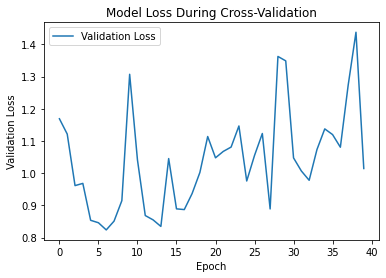

In [ ]:
plt.plot(xray_model.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])

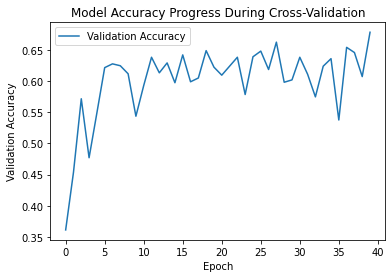

In [ ]:
plt.plot(xray_model.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

# PHẦN 3: DỰ ĐOÁN TRÊN MÔ HÌNH MỚI

In [ ]:

predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

In [ ]:
predicted_classes

array([0, 2, 2, ..., 0, 1, 1])

In [ ]:

from sklearn.utils import shuffle
df = shuffle(true_classes)
df

array([1, 0, 0, ..., 0, 1, 1], dtype=int32)

**3.1  ĐÁNH GIÁ TRÊN MA TRẬN LỖI**

                  precision    recall  f1-score   support

          NORMAL       0.31      0.24      0.27       413
       PNEUMONIA       0.35      0.34      0.34       460
PNEUMONIA(VIRUS)       0.33      0.40      0.36       450

        accuracy                           0.33      1323
       macro avg       0.33      0.33      0.32      1323
    weighted avg       0.33      0.33      0.33      1323

[[100 140 173]
 [110 156 194]
 [117 155 178]]


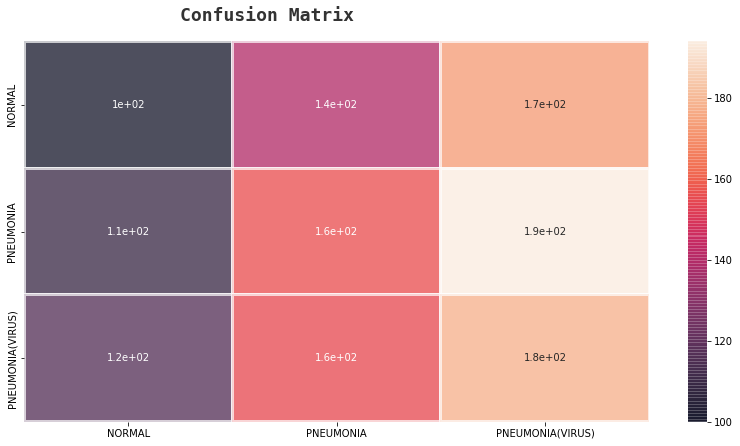

In [ ]:
report = classification_report(df, predicted_classes, target_names=class_labels)
print(report)
fig,ax=plt.subplots(1,1,figsize=(14,7))
labels = ['NORMAL', 'PNEUMONIA', 'PNEUMONIA(VIRUS)']
sns.heatmap(confusion_matrix(df, predicted_classes),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            #cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            #linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         #color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(df, predicted_classes))
plt.show()

In [ ]:
pred_with_filenames = {}
files = test_set.filenames
files.sort()
for filename, pred in zip(files, predictions):
    pred_with_filenames[filename.split('/')[1]] = pred[0]

# PHẦN 4: DỰ ĐOÁN KẾT QUẢ DỰA TRÊN ĐIỂM DỮ LIỆU MỚI HOÀN TOÀN Ở TẬP TEST

In [ ]:
def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(128,128,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

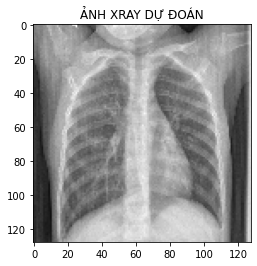

KẾT QUẢ DỰ ĐOÁN BỆNH: = NORMAL

NGƯỜI CÓ SỨC KHỎE BÌNH THƯỜNG : 100.0 percent

NGƯỜI BỊ BỆNH VIÊM PHỔI: 0.0 percent

NGƯỜI BỊ BỆNH ƯNG THƯ PHỔI: 0.0 percent


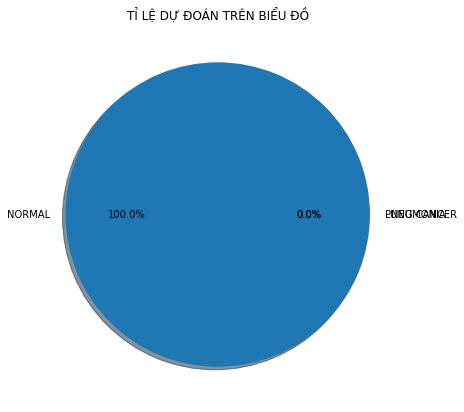

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)
labels = ['NORMAL','PNEUMONIA', 'PNEUMONIA(VIRUS)']
path = "/content/drive/MyDrive/tai lieu AI/datasets_xray/test/NORMAL/IM-0009-0001.jpeg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

# to display the image
plt.imshow(img[0]/255, cmap = "gray")
plt.title("ẢNH XRAY DỰ ĐOÁN")
plt.show()

res = labels[np.argmax(model.predict(img))]
print(f"KẾT QUẢ DỰ ĐOÁN BỆNH: = {res}")
print()
print(f"NGƯỜI CÓ SỨC KHỎE BÌNH THƯỜNG : {model.predict(img)[0][0]*100} percent")
print()
print(f"NGƯỜI BỊ BỆNH VIÊM PHỔI: {model.predict(img)[0][1]*100} percent")
print()
print(f"NGƯỜI BỊ BỆNH ƯNG THƯ PHỔI: {model.predict(img)[0][2]*100} percent")

label = ['NORMAL','PNEUMONIA', 'LUNG CANCER']
a = model.predict(img)[0][0]*100
b = model.predict(img)[0][1]*100
c = model.predict(img)[0][2]*100
data = [a, b, c]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.title("TỈ LỆ DỰ ĐOÁN TRÊN BIỂU ĐỒ")
plt.pie(data, labels = label, autopct='%1.1f%%', shadow=True)
plt.show()

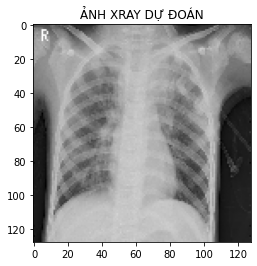

KẾT QUẢ DỰ ĐOÁN BỆNH: = NORMAL

NGƯỜI CÓ SỨC KHỎE BÌNH THƯỜNG : 1.0 percent

NGƯỜI BỊ BỆNH VIÊM PHỔI: 0.0 percent

NGƯỜI BỊ BỆNH ƯNG THƯ PHỔI: 1.0 percent


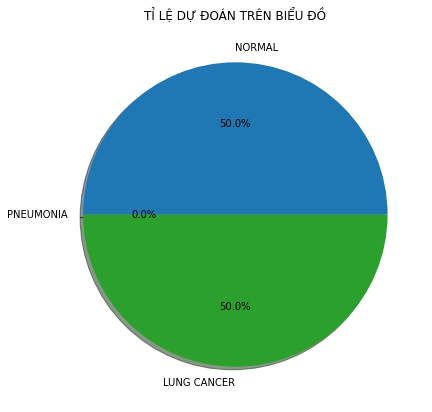

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)
labels = ['NORMAL','PNEUMONIA', 'PNEUMONIA(VIRUS)']
path = "/content/drive/MyDrive/tai lieu AI/datasets_xray/test/PNEUMONIA(VIRUS)/person101_virus_187.jpeg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

# to display the image
plt.imshow(img[0]/255, cmap = "gray")
plt.title("ẢNH XRAY DỰ ĐOÁN")
plt.show()

res = labels[np.argmax(model.predict(img))]
print(f"KẾT QUẢ DỰ ĐOÁN BỆNH: = {res}")
print()
print(f"NGƯỜI CÓ SỨC KHỎE BÌNH THƯỜNG : {model.predict(img)[0][0]} percent")
print()
print(f"NGƯỜI BỊ BỆNH VIÊM PHỔI: {model.predict(img)[0][1]} percent")
print()
print(f"NGƯỜI BỊ BỆNH ƯNG THƯ PHỔI: {model.predict(img)[0][2]} percent")

label = ['NORMAL','PNEUMONIA', 'LUNG CANCER']
a = model.predict(img)[0][0]
b = model.predict(img)[0][1]
c = model.predict(img)[0][2]
data = [a, b, c]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.title("TỈ LỆ DỰ ĐOÁN TRÊN BIỂU ĐỒ")
plt.pie(data, labels = label, autopct='%1.1f%%', shadow=True)
plt.show()

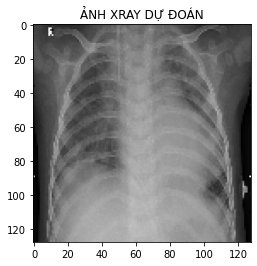

KẾT QUẢ DỰ ĐOÁN BỆNH: = NORMAL

NGƯỜI CÓ SỨC KHỎE BÌNH THƯỜNG : 1.0 percent

NGƯỜI BỊ BỆNH VIÊM PHỔI: 0.0 percent

NGƯỜI BỊ BỆNH ƯNG THƯ PHỔI: 1.0 percent


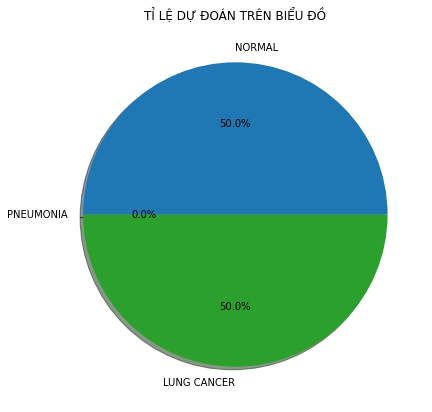

In [ ]:
# path for that new image. ( you can take it either from google or any other scource)
labels = ['NORMAL','PNEUMONIA', 'PNEUMONIA(VIRUS)']
path = "/content/drive/MyDrive/tai lieu AI/datasets_xray/test/PNEUMONIA/person101_bacteria_485.jpeg"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

# to display the image
plt.imshow(img[0]/255, cmap = "gray")
plt.title("ẢNH XRAY DỰ ĐOÁN")
plt.show()

res = labels[np.argmax(model.predict(img))]
print(f"KẾT QUẢ DỰ ĐOÁN BỆNH: = {res}")
print()
print(f"NGƯỜI CÓ SỨC KHỎE BÌNH THƯỜNG : {model.predict(img)[0][0]} percent")
print()
print(f"NGƯỜI BỊ BỆNH VIÊM PHỔI: {model.predict(img)[0][1]} percent")
print()
print(f"NGƯỜI BỊ BỆNH ƯNG THƯ PHỔI: {model.predict(img)[0][2]} percent")

label = ['NORMAL','PNEUMONIA', 'LUNG CANCER']
a = model.predict(img)[0][0]
b = model.predict(img)[0][1]
c = model.predict(img)[0][2]
data = [a, b, c]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.title("TỈ LỆ DỰ ĐOÁN TRÊN BIỂU ĐỒ")
plt.pie(data, labels = label, autopct='%1.1f%%', shadow=True)
plt.show()

# **END**

In [ ]:
model_final = model
a1 = tf.keras.optimizers.Adam(learning_rate=1e-1)
model_final.compile(loss='categorical_crossentropy',
              optimizer = a1,
              metrics= ['accuracy'])

# save model to file
model_final.save('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_final1.h5')

In [ ]:
#  Tăng cường dữ liệu
print('Train set: ')
data_gen = ImageDataGenerator(rescale=1.0 / 255.0,
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   vertical_flip=True,
                                   zoom_range=[0.3, 0.6],
                                   brightness_range = [0.4, 0.6],
                                   fill_mode='nearest')

train_set = data_gen.flow_from_directory(directory=train_folder,
                                    target_size = (128,128),
                                    batch_size = 32,
                                    shuffle=True,
                                    color_mode="rgb",
                                    class_mode="categorical",
                                    seed=42)

print('Test set:')
test_set = data_gen.flow_from_directory(directory=test_folder,
                                    target_size = (128,128),
                                    batch_size = 32,
                                    shuffle=True,
                                    color_mode="rgb",
                                    class_mode="categorical",
                                    seed=42)

print('Validation set:')
val_set = data_gen.flow_from_directory(directory=val_folder,
                                    target_size = (128,128),
                                    batch_size = 32,
                                    shuffle=True,
                                    color_mode="rgb",
                                    class_mode="categorical",
                                    seed=42)

Train set: 
Found 3649 images belonging to 3 classes.
Test set:
Found 1323 images belonging to 3 classes.
Validation set:
Found 66 images belonging to 3 classes.


In [ ]:
from keras.layers import SeparableConv2D
from keras import optimizers,regularizers
from tensorflow.python.keras import regularizers
from tensorflow.keras.optimizers import SGD
#Tạo mô hình
model = Sequential()

# First Block of CNN
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#  Second Block of CNN
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#  Third Block of CNN
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#  Flatten and Fully Connected Layer
#  Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

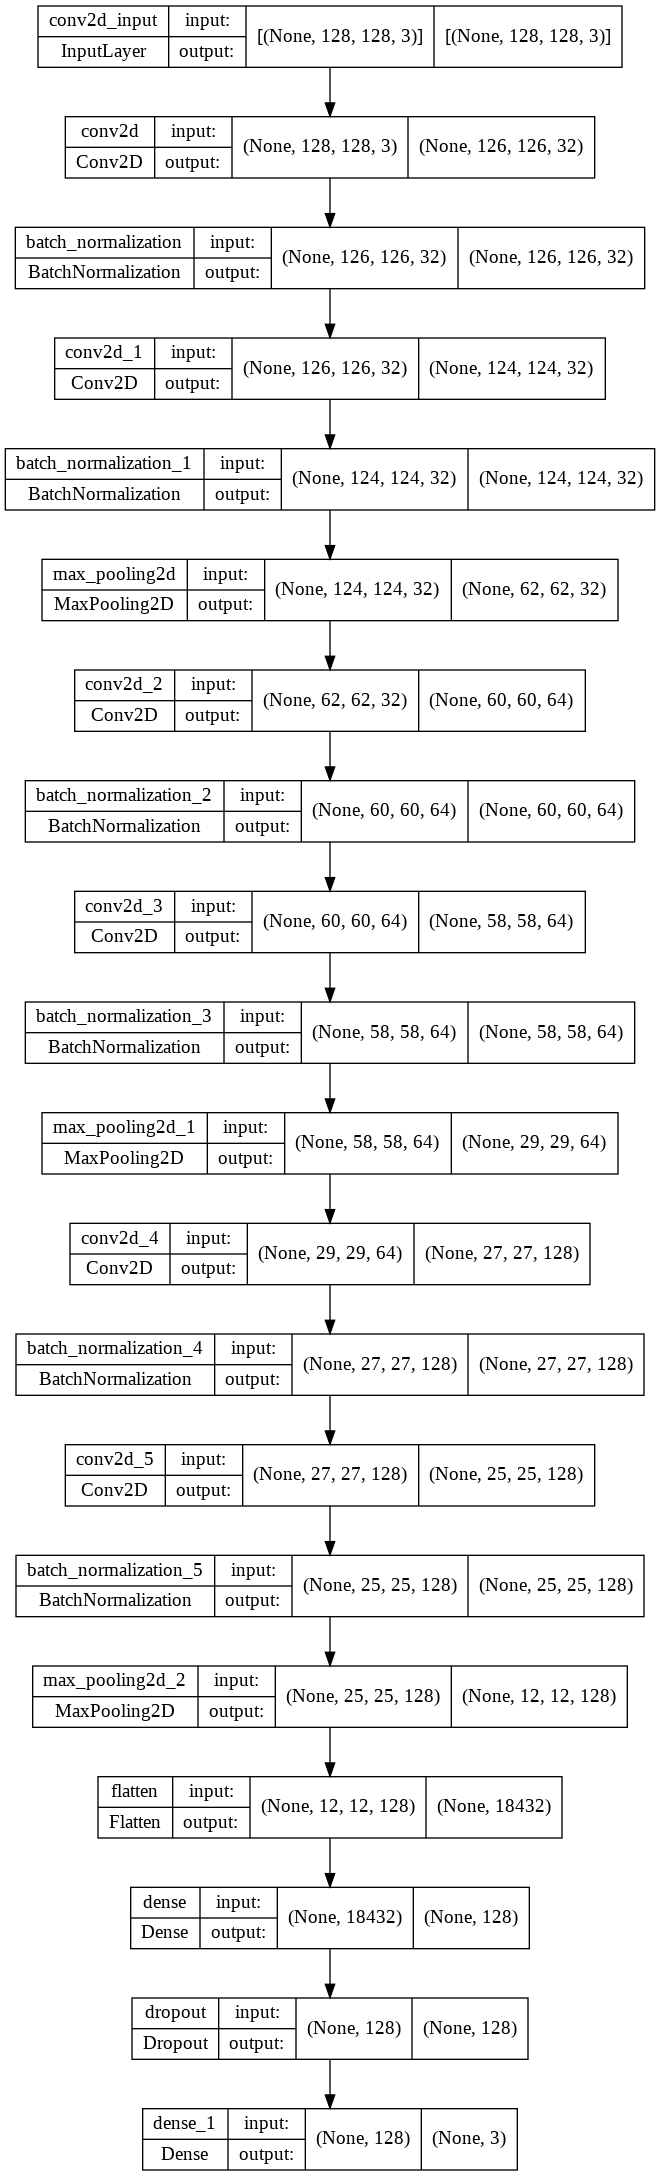

In [ ]:
#  Hiển thị hàm model.summary() dưới dạng biểu đồ
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='/content/drive/MyDrive/tai lieu AI/datasets_xray/model.png',show_shapes = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                        

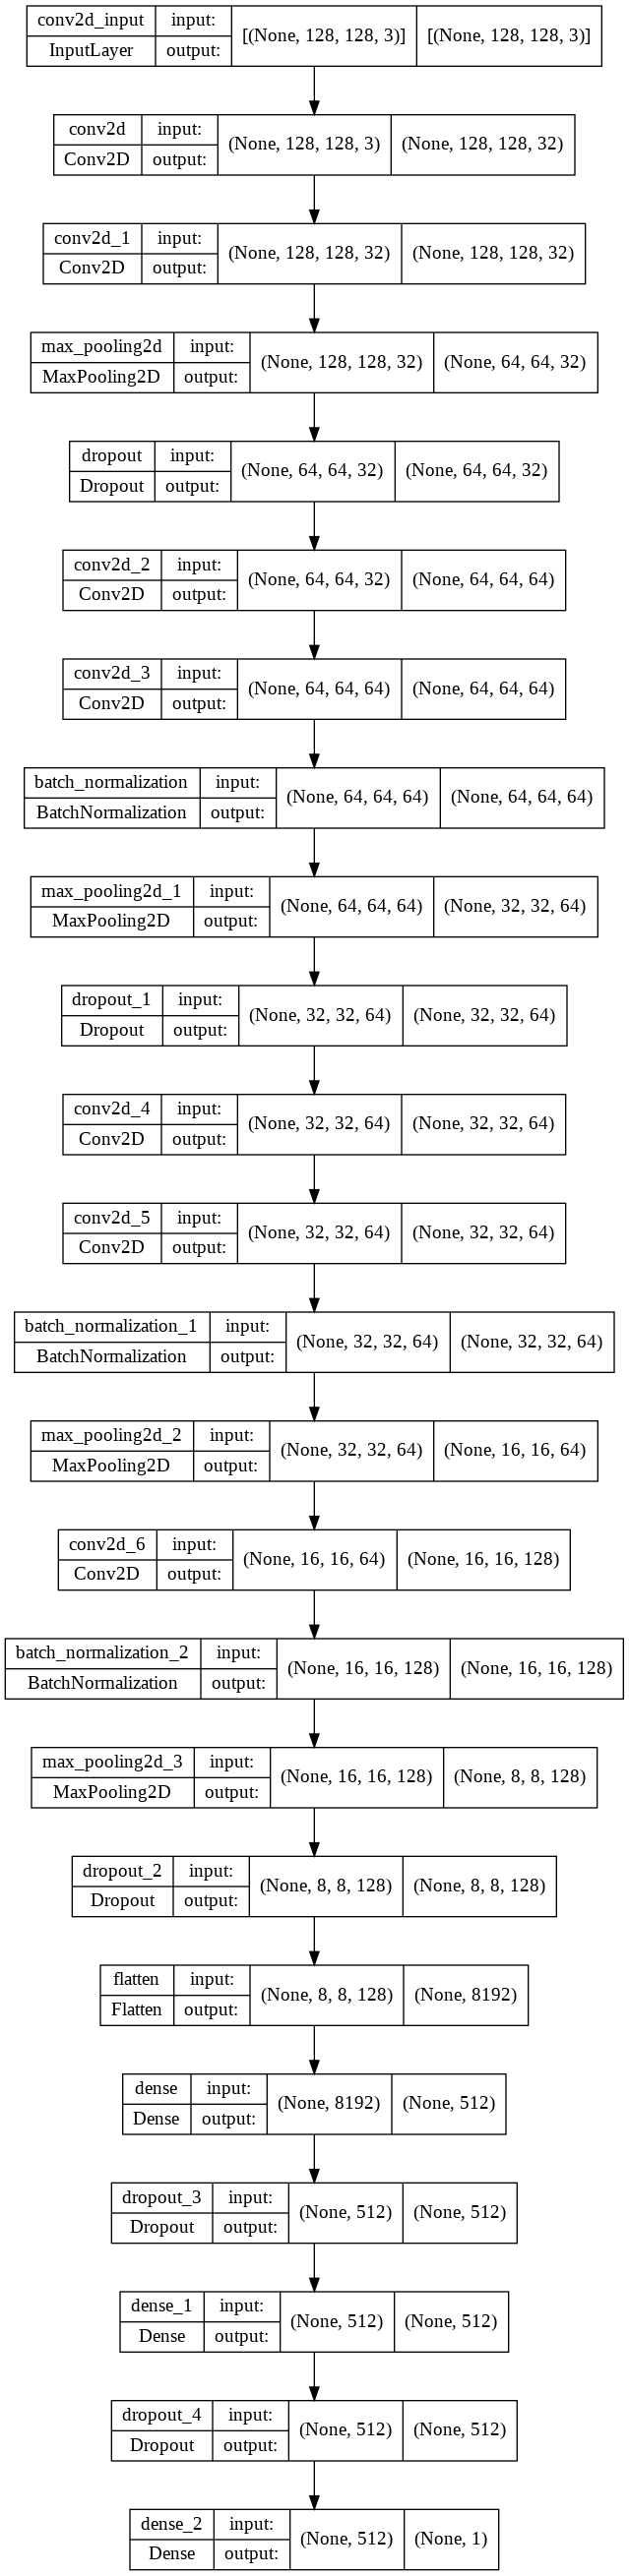

In [ ]:
from keras.layers import SeparableConv2D
from keras import optimizers,regularizers
from tensorflow.python.keras import regularizers
from tensorflow.keras.optimizers import SGD
from keras.models import *


#Dropout là kĩ thuật giúp tránh overfitting giúp cho mô hình bớt phức tạp (p thuộc [0.2, 0.5]) .

# convolutional layers
cnn_model = Sequential()

# First Block of CNN
cnn_model.add(Conv2D(32,(3,3), padding='same',activation="relu", input_shape=(128,128,3)))
cnn_model.add(Conv2D(32,(3,3), padding='same',activation="relu"))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Dropout(rate=0.3))

#  Second Block of CNN
cnn_model.add(Conv2D(64,(3,3), padding='same',activation="relu"))
cnn_model.add(Conv2D(64,(3,3), padding='same',activation="relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Dropout(rate=0.3))

#  Third Block of CNN
cnn_model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn_model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2,2)))

#  Fourth Block of CNN
cnn_model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn_model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Dropout(rate=0.3))

#  Flatten and Fully Connected Layer
cnn_model.add(Flatten())

# dense layers
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dropout(rate=0.3))
cnn_model.add(Dense(units=256, activation='relu'))
cnn_model.add(Dropout(rate=0.3))


#2 class name trong tập train
cnn_model.add(Dense(activation = 'sigmoid', units = 1))
#  Display cnn_model
cnn_model.summary()

#  Hiển thị hàm cnn_model.summary() dưới dạng biểu đồ
from tensorflow.keras.utils import plot_model
plot_model(cnn_model,show_shapes = True)

In [ ]:
sgd_model = model
# Compile model
epochs = 150
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# save model to file
sgd_model.save('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/sgd_model_1.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
cd /content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/

/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train


In [ ]:
!ls

accuracy_trainD.png  loss_trainA.png  loss_train.png  sgd_model_v1.h5
best_model_sgd.h5    loss_trainB.png  model.png       sgd_v1.h5
final_model.h5	     loss_trainC.png  sgd_model_1.h5
final_model_sgd.h5   loss_trainE.png  sgd_model.h5


In [ ]:
save_dir = '/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/'
model_name = 'final_model.h5'
new_model = os.path.join(save_dir, model_name)
sgd_model.save (new_model)
print( 'Saved trained model at %s ' % new_model)

Saved trained model at /content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/final_model.h5 


In [ ]:
sgd_model.save('best_model_sgd.h5')

In [ ]:
sgd_model.save('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/best_model_sgd.h5')

In [ ]:
print(xray_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/final_model_ONL.h5')

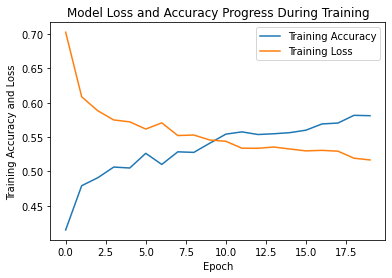

In [ ]:
plt.plot(xray_model.history['accuracy'])
plt.plot(xray_model.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

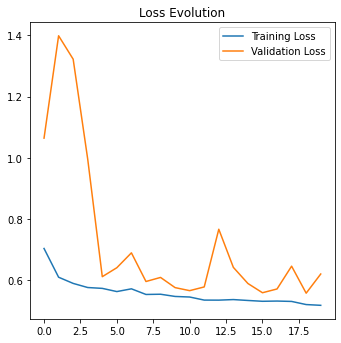

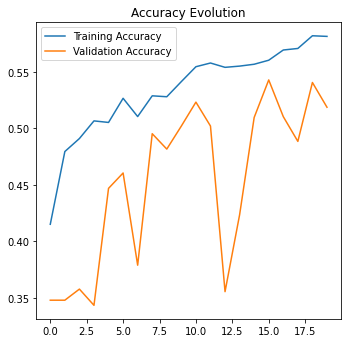

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.plot(xray_model.history['loss'], label='Training Loss')
plt.plot(xray_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/loss_trainA.png')
plt.title('Loss Evolution')
plt.show()

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 2)
plt.plot(xray_model.history['accuracy'], label='Training Accuracy')
plt.plot(xray_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/loss_trainB.png')
plt.title('Accuracy Evolution')
plt.show()

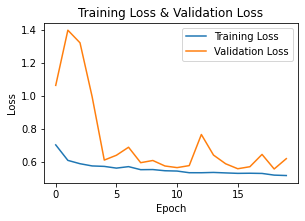

<Figure size 432x288 with 0 Axes>

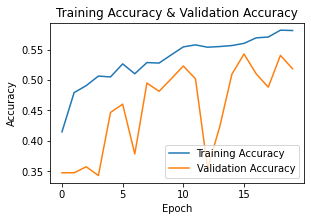

<Figure size 432x288 with 0 Axes>

In [ ]:
# Tiếp theo ta plot các thông số loss và acc ra

plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
plt.plot(xray_model.history["loss"],label = "Training Loss")
plt.plot(xray_model.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/loss_trainC.png')

plt.figure(figsize=(10,10))
plt.subplot(3, 2, 2)
plt.plot(xray_model.history["accuracy"],label = "Training Accuracy")
plt.plot(xray_model.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/accuracy_trainD.png')

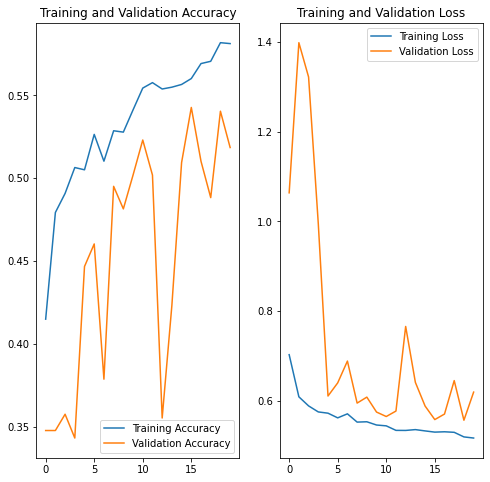

In [ ]:
acc = xray_model.history['accuracy']
val_acc = xray_model.history['val_accuracy']

loss = xray_model.history['loss']
val_loss = xray_model.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/loss_trainE.png')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/loss_train.png')
plt.show()

In [ ]:
filepath='/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/weights_best_1.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
xray_model = sgd_model.fit(train_set,
                            batch_size=32,
                            callbacks=callbacks_list,
                            epochs = 40,
                            validation_data = test_set,
                            verbose = 1)

Epoch 1/40
163/163 [==============================] - 516s 3s/step - loss: 0.5157 - accuracy: 0.7529 - val_loss: 2.9516 - val_accuracy: 0.6250
Epoch 2/40
163/163 [==============================] - 88s 543ms/step - loss: 0.4368 - accuracy: 0.7828 - val_loss: 2.6689 - val_accuracy: 0.6250
Epoch 3/40
163/163 [==============================] - 89s 543ms/step - loss: 0.4358 - accuracy: 0.7851 - val_loss: 3.4502 - val_accuracy: 0.6250
Epoch 4/40
163/163 [==============================] - 88s 537ms/step - loss: 0.4057 - accuracy: 0.8050 - val_loss: 1.4732 - val_accuracy: 0.6362
Epoch 5/40
163/163 [==============================] - 90s 554ms/step - loss: 0.3953 - accuracy: 0.8085 - val_loss: 0.6356 - val_accuracy: 0.7308
Epoch 6/40
163/163 [==============================] - 89s 546ms/step - loss: 0.3839 - accuracy: 0.8250 - val_loss: 0.7228 - val_accuracy: 0.6939
Epoch 7/40
163/163 [==============================] - 89s 543ms/step - loss: 0.3766 - accuracy: 0.8229 - val_loss: 0.5722 - val_accu

In [ ]:
sgd_model.save('best_model_sgd.h5')

In [ ]:
sgd_model.save('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/best_model_sgd.h5')

In [ ]:
from google.colab import files
files.download('best_model_sgd.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
save_dir = '/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/'
model_name = 'final_model_sgd.h5'
new_model = os.path.join(save_dir, model_name)
sgd_model.save (new_model)
print( 'Saved trained model at %s ' % new_model)

Saved trained model at /content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/final_model_sgd.h5 


In [ ]:
cd '/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/'

/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train


In [ ]:
!ls

best_model_sgd.h5  final_model_sgd.h5  sgd_model.h5	sgd_v1.h5
final_model.h5	   sgd_model_1.h5      sgd_model_v1.h5


In [ ]:
from google.colab import files
files.download('best_model_sgd.h5')
new_model = tf.keras.models.load_model('/content/drive/MyDrive/tai lieu AI/datasets_xray/model_train/best_model_sgd.h5')

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 batch_normalization_7 (Batc  (None, 124, 124, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                      

In [ ]:
#  In kết quả loss và accuracy của tập test data
#  Evaluation on test dataset
#  ĐÁNH GIÁ MÔ HÌNH DỰA TRÊN TẬP TEST

# Evaluating the model on train and test
# Train data
score_train = new_model.evaluate(train_set)
print("Train Loss: ", score_train[0])
print("Train Accuracy: ", score_train[1])

# Val data
score_val = new_model.evaluate(val_set)
print("Test Loss: ", score_val[0])
print("Test Accuracy: ", score_val[1])


163/163 [==============================] - 1217s 8s/step - loss: 0.2977 - accuracy: 0.8702
Train Loss:  0.2977127730846405
Train Accuracy:  0.8702070713043213
1/1 [==============================] - 1s 609ms/step - loss: 2.3118 - accuracy: 0.5625
Test Loss:  2.311782121658325
Test Accuracy:  0.5625


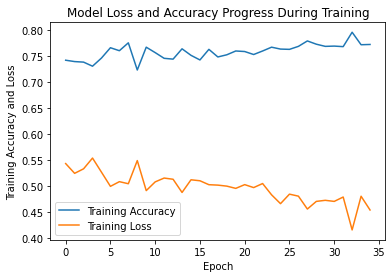

In [ ]:

plt.plot(xray_model.history['accuracy'])
plt.plot(xray_model.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

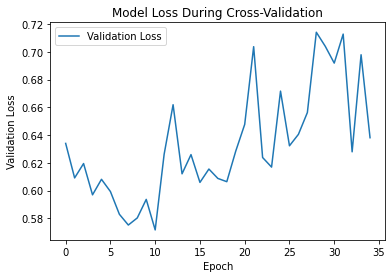

In [ ]:
plt.plot(xray_model.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])

plt.plot(xray_model.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

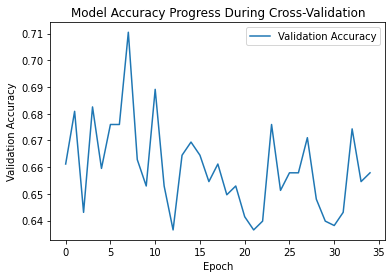

In [ ]:
plt.plot(xray_model.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

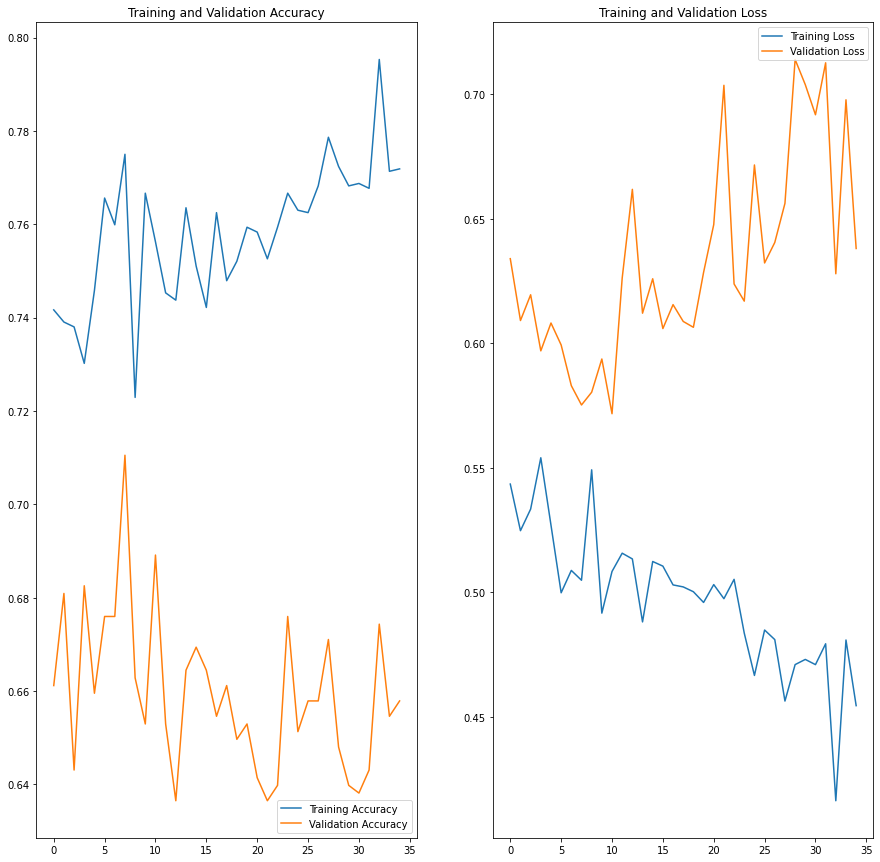

In [ ]:
acc = xray_model.history['accuracy']
val_acc = xray_model.history['val_accuracy']

loss = xray_model.history['loss']
val_loss = xray_model.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()